In [30]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [31]:
train_labels=[]
train_samples=[]

In [32]:
for i in range(50):
  # ~5% of younger individuals who did experience the side effect
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)
  # ~5% of of older individuals who did not experience the side effect
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)
for i in range(1000):
  # ~95% of younger individuals who did not experience the side effect
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)
  #95% of older individuals who did experience side effect
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [33]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)

In [34]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_trained_samples=scaler.fit_transform(train_samples.reshape(-1,1))

# **Defining a model**

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [36]:
model=Sequential([Dense(units=16,input_shape=(1,),activation='relu'),Dense(units=32,activation='relu'),Dense(units=2,activation='softmax')])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# **Training the model**

In [38]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.fit(x=scaled_trained_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.7136 - accuracy: 0.4899 - val_loss: 0.6953 - val_accuracy: 0.4667
Epoch 2/30
189/189 - 0s - loss: 0.6728 - accuracy: 0.7386 - val_loss: 0.6424 - val_accuracy: 0.9095
Epoch 3/30
189/189 - 0s - loss: 0.6212 - accuracy: 0.8894 - val_loss: 0.5867 - val_accuracy: 0.9143
Epoch 4/30
189/189 - 0s - loss: 0.5755 - accuracy: 0.8910 - val_loss: 0.5421 - val_accuracy: 0.9143
Epoch 5/30
189/189 - 0s - loss: 0.5379 - accuracy: 0.8947 - val_loss: 0.5017 - val_accuracy: 0.9143
Epoch 6/30
189/189 - 0s - loss: 0.5033 - accuracy: 0.8921 - val_loss: 0.4650 - val_accuracy: 0.9286
Epoch 7/30
189/189 - 0s - loss: 0.4717 - accuracy: 0.8958 - val_loss: 0.4306 - val_accuracy: 0.9286
Epoch 8/30
189/189 - 0s - loss: 0.4433 - accuracy: 0.8979 - val_loss: 0.4006 - val_accuracy: 0.9429
Epoch 9/30
189/189 - 0s - loss: 0.4183 - accuracy: 0.8989 - val_loss: 0.3737 - val_accuracy: 0.9429
Epoch 10/30
189/189 - 0s - loss: 0.3966 - accuracy: 0.9063 - val_loss: 0.3491 - val_accuracy: 0.9429

# **Neural Network Prediction with Tensorflow's Keras API**

In [40]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [41]:
test_labels=[]
test_samples=[]

Example Test Data:

->An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.

->The trial had 2100 participants. Half were under 65 years old. Half were 65 year or older.

->Around 95% of patients 65 or older experienced side effect.

->Around 95% of patients under 65 experienced no side effect.

In [42]:
for i in range(10):
  # ~5% of younger individuals who did experience the side effect
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)
  # ~5% of of older individuals who did not experience the side effect
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)
for i in range(200):
  # ~95% of younger individuals who did not experience the side effect
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)
  #95% of older individuals who did experience side effect
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [43]:
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
test_labels,test_samples=shuffle(test_labels,test_samples)

In [44]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

# **Predict**

In [45]:
predictions=model.predict(x=scaled_test_samples,batch_size=10,verbose=0)

In [46]:
for i in predictions:
  print(i)

[0.08615594 0.9138441 ]
[0.95001113 0.04998882]
[0.06456928 0.93543077]
[0.9759267 0.0240733]
[0.05271753 0.9472825 ]
[0.07282791 0.92717206]
[0.04857734 0.9514227 ]
[0.976144   0.02385598]
[0.07886369 0.9211363 ]
[0.6287458  0.37125424]
[0.40350905 0.596491  ]
[0.53333485 0.4666652 ]
[0.56577617 0.4342239 ]
[0.05718939 0.9428106 ]
[0.9757075  0.02429255]
[0.1915963  0.80840373]
[0.9690874  0.03091259]
[0.17210639 0.8278936 ]
[0.1098709  0.89012915]
[0.96594363 0.03405639]
[0.1098709  0.89012915]
[0.9757075  0.02429255]
[0.97194946 0.02805057]
[0.21272616 0.7872739 ]
[0.97720224 0.02279776]
[0.06456928 0.93543077]
[0.06456928 0.93543077]
[0.06722039 0.93277955]
[0.21272616 0.7872739 ]
[0.96594363 0.03405639]
[0.97631216 0.02368778]
[0.09931732 0.9006827 ]
[0.9745816  0.02541836]
[0.04662473 0.9533753 ]
[0.97481084 0.0251892 ]
[0.04857734 0.9514227 ]
[0.9741173  0.02588277]
[0.05491062 0.9450894 ]
[0.97388196 0.02611806]
[0.17210639 0.8278936 ]
[0.6287458  0.37125424]
[0.9690874  0.0309

In [47]:
rounded_predictions=np.argmax(predictions,axis=-1)

In [48]:
for i in rounded_predictions:
  print(i)

1
0
1
0
1
1
1
0
1
0
1
0
0
1
0
1
0
1
1
0
1
0
0
1
0
1
1
1
1
0
0
1
0
1
0
1
0
1
0
1
0
0
0
1
1
0
0
1
0
1
1
0
0
1
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
1
0
1
0
1
1
1
0
0
1
0
0
0
1
0
0
1
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
1
1
1
1
0
0
1
0
0
0
1
1
0
1
0
0
1
1
0
1
0
1
0
1
1
1
0
0
0
1
1
0
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
0
0
0
1
1
1
0
1
1
1
1
1
0
0
1
1
1
0
1
1
0
1
1
0
1
1
0
1
0
0
1
0
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
0
0
1
1
0
0
1
1
0
1
1
1
0
0
1
0
1
1
1
1
1
0
1
1
1
1
0
0
0
0
1
0
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
1
0
1
0
0
0
0
0
1
1
0
0
1
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
1
1
1
1
1
0
0
0
1
1
0
1
1
0
1
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
0
0
0
1
1
1
1
1
1
0
1
1
0
1
0
1
0
1
1
1
1
0
0
1
1
0
0
1
0
0
1
0
0
1
1
1
0
0
0
0
0
1
1
1
1
0
1
0
1
1
0
0
0


# **Confusion Matrix**

In [49]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [50]:
cm=confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[189  21]
 [ 10 200]]


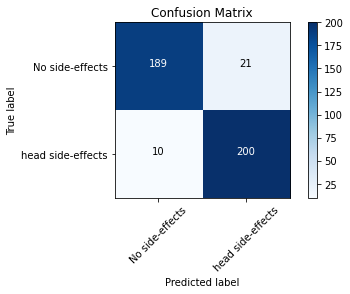

In [52]:
cm_plot_labels=['No side-effects','head side-effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')